In [1]:
cd /nfs/xf11id

/nfs/xf11id


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pims
import numpy as np
import os
import pyXPCS.waterfall
import logging

logger = logging.getLogger('__main__')
logger.setLevel(logging.INFO)

In [12]:
filepath = '/nfs/xf11id/data/2015/4/4'
filename = 'Bfiber_s0p4_overweekend_*.tiff'
full_path = os.path.join(filepath, filename)

def make_gray(image):
    return image.sum(axis=-1)

frames = pims.ImageSequence(full_path, process_func=make_gray)
frames



<Frames>
Source: /nfs/xf11id/data/2015/4/4/Bfiber_s0p4_overweekend_*.tiff
Length: 4602 frames
Frame Shape: 2050 x 2448
Pixel Datatype: uint8

In [4]:
labels = np.zeros_like(frames[0])
labels[:, 1000] = 1
indices = pyXPCS.waterfall.labels_to_indices(labels)

In [5]:
result = pyXPCS.waterfall.waterfall(frames, indices)

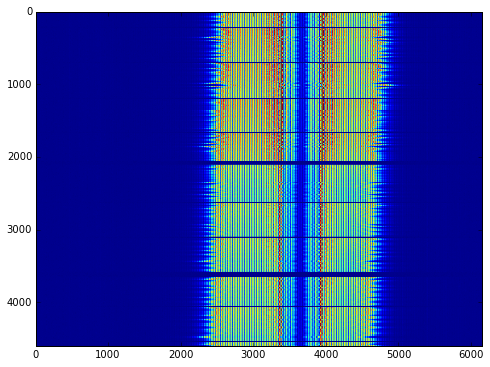

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(result[1])
ax.set_aspect(1)

In [8]:
result[1].shape

(4602, 6150)

In [10]:
import pandas as pd
pd.Series(labels.ravel()).value_counts()

/home/dallan/mc/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module _tifffile was already imported from /home/dallan/mc/lib/python2.7/site-packages/_tifffile.so, but /nfs/dallan/mc/lib/python2.7/site-packages/PIMS-0.2.0-py2.7-linux-x86_64.egg is being added to sys.path
  from pkg_resources import resource_stream


0    15049050
1        6150
dtype: int64

In [12]:
np.empty((len(frames), len(indices[0]))).shape

MemoryError: 

In [10]:
indices

{0: array([       0,        1,        2, ..., 15055197, 15055198, 15055199]),
 1: array([    3000,     3001,     3002, ..., 15050856, 15050857, 15050858])}